<a href="https://colab.research.google.com/github/Praewphat/ckdresearch2023/blob/main/LSTM_Keras_(TSR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สร้างแบบจำลองทำนาย LSTM สำหรับแก้ปัญหา Time Series Regression ในภาษา Python และ Keras library

ชุดข้อมูล : ชุดข้อมูล "Beijing PM2.5 Data" เป็นชุดข้อมูลที่เกี่ยวข้องกับคุณภาพอากาศในเขตกรุงเทพปักกิ่ง (Beijing), ประเทศจีน โดยมีการตรวจวัดค่า PM2.5 หรือ Particulate Matter 2.5 micrograms per cubic meter ในอากาศ ซึ่งเป็นค่าที่ใช้วัดความเข้มข้นของฝุ่นละอองและสารพิษขนาดเล็กที่อยู่ในอากาศที่สามารถกระจายละอองลงไปในระบบทางเดินหายใจของมนุษย์ได้ และมีผลกระทบต่อสุขภาพมนุษย์ได้ น้อยค่า PM2.5 จะเป็นสิ่งที่ดี ค่ามากเท่าใดก็แสดงถึงความเสี่ยงต่อสุขภาพมนุษย์ที่มากขึ้น
1. No: หมายเลขลำดับของข้อมูล
2. year: ปีที่วัดค่า PM2.5
3. month: เดือนที่วัดค่า PM2.5
4. day: วันที่วัดค่า PM2.5
5. hour: ชั่วโมงที่วัดค่า PM2.5
6. pm2.5: ค่า PM2.5 ในหน่วย micrograms per cubic meter
7. DEWP: อุณหภูมิจุดคะแนนหลุมน้ำ (Dew Point) ในองศาเซลเซียส
8. TEMP: อุณหภูมิในองศาเซลเซียส
9. PRES: ความกดอากาศในเฮกโตปาสคาล (Hectopascal)
10. cbwd: ทิศทางลมปัจจุบัน (เช่น ทิศตะวันออกตะวันตก)
11. Iws: ความเร็วลมเฉลี่ยในชั่วโมงละไมล์ต่อชั่วโมง
12. Is: ความหนาของหิมะในชั่วโมงละมิลลิเมตร
13. Ir: การฝนตกในชั่วโมงละมิลลิเมตร

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv', index_col=0, parse_dates=True)
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df.shape

(43824, 12)

In [ ]:
df.isna().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [ ]:
import datetime

# Check the column names
print(df.columns)

# Create a new 'time' column using a lambda function
df['time'] = df.apply(lambda x: datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)

# Drop the columns you no longer need, if they exist
columns_to_drop = ['year', 'month', 'day', 'hour', 'No']
df.drop(columns=[col for col in columns_to_drop if col in df], inplace=True)

# Set the 'time' column as the index
df.set_index('time', inplace=True)

# Display the first few rows of the DataFrame
df.head()



Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
time,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
#Drop categorical varaiable
train_df = df.drop(columns=['cbwd','Is','Ir'])['2012-01-01':'2013-12-31']
train_df.head()


,pm2.5,DEWP,TEMP,PRES,Iws
time,,,,,
2012-01-01 00:00:00,275.0,-12,-8.0,1030.0,0.89
2012-01-01 01:00:00,303.0,-13,-10.0,1031.0,1.79
2012-01-01 02:00:00,215.0,-13,-9.0,1032.0,3.58
2012-01-01 03:00:00,222.0,-13,-9.0,1033.0,6.71
2012-01-01 04:00:00,85.0,-13,-4.0,1033.0,4.92


In [ ]:
train_df.shape

(17544, 5)

In [ ]:
train_df.isna().sum()

pm2.5    571
DEWP       0
TEMP       0
PRES       0
Iws        0
dtype: int64

In [ ]:
#interpolate missing values using interpolation techniques
train_df = train_df.interpolate(method='linear')
train_df.isna().sum()

pm2.5    0
DEWP     0
TEMP     0
PRES     0
Iws      0
dtype: int64

In [ ]:
# Apply the max-min scaler to the dataset
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler (feature_range=(0,1))
y_scaler = MinMaxScaler(feature_range=(0,1))

x_all = x_scaler.fit_transform(train_df)
y_all = y_scaler.fit_transform(train_df[['pm2.5']].to_numpy())

x_all = pd.DataFrame(data=x_all, index=train_df.index, columns=train_df.columns)
y_all = pd.DataFrame(data=y_all, index=train_df.index, columns=['pm2.5'])



In [ ]:
#all input (รวม y ไป predict ด้วย )
x_all.shape

(17544, 5)

In [ ]:
y_all.shape

(17544, 1)

In [ ]:
#เเเบ่งข้อมูลเป็น sample
# Prepare the training data to LSTM network.
#Here, we will use the data in the past 30 days to predict the data in the next day.
# - The input X is a set of overlapping windows.
unrolled_steps = 30
test_size = 0.2

n_features = x_all.columns.size
n_samples = (x_all.shape[0]-unrolled_steps-1) #Predict 1 step ahead
n_test_samples = int(n_samples*test_size)
n_train_samples = n_samples - n_test_samples


In [ ]:
#แบ่งข้อมูล train input ส่วนไหน คู่กับ train out put ส่วนไหน
# Create 3D array of samples x (# time steps) x (# features)
features = [] #traind input
targets = [] #train output

for i in range(n_samples): # time_steps, X_train.shape[0]
  end = i+unrolled_steps
  features. append(x_all [i : end])

  st = i+unrolled_steps
  end = st+1
  targets.append(y_all [st : end])
features = np.stack(features).reshape(-1, unrolled_steps, n_features)
targets = np.stack(targets).reshape(-1, 1)

In [ ]:
features.shape

(17513, 30, 5)

In [ ]:
targets. shape

(17513, 1)

In [ ]:
x_train, x_test = features[:n_train_samples], features [n_train_samples:]
y_train, y_test = targets [:n_train_samples], targets [n_train_samples:]
print('Train x input shape: ', x_train. shape)
print('Test x input shape: ', x_test.shape)
print('Train y output shape: ', y_train.shape)
print('Test y output shape: ', y_test.shape)

Train x input shape:  (14011, 30, 5)
Test x input shape:  (3502, 30, 5)
Train y output shape:  (14011, 1)
Test y output shape:  (3502, 1)


In [ ]:
# Create and fit an LSTM network
# See options in https://keras.io/layers/recurrent/
from keras.layers import LSTM, Dense, Activation
from keras.models import Sequential

pred_steps = 1
model = Sequential([
    LSTM(units=12, input_shape=[None, x_train.shape[2]], return_sequences=True),
    LSTM(units=8),
    Dense(units=pred_steps, activation='relu'),
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 12)          864       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 672       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1545 (6.04 KB)
Trainable params: 1545 (6.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


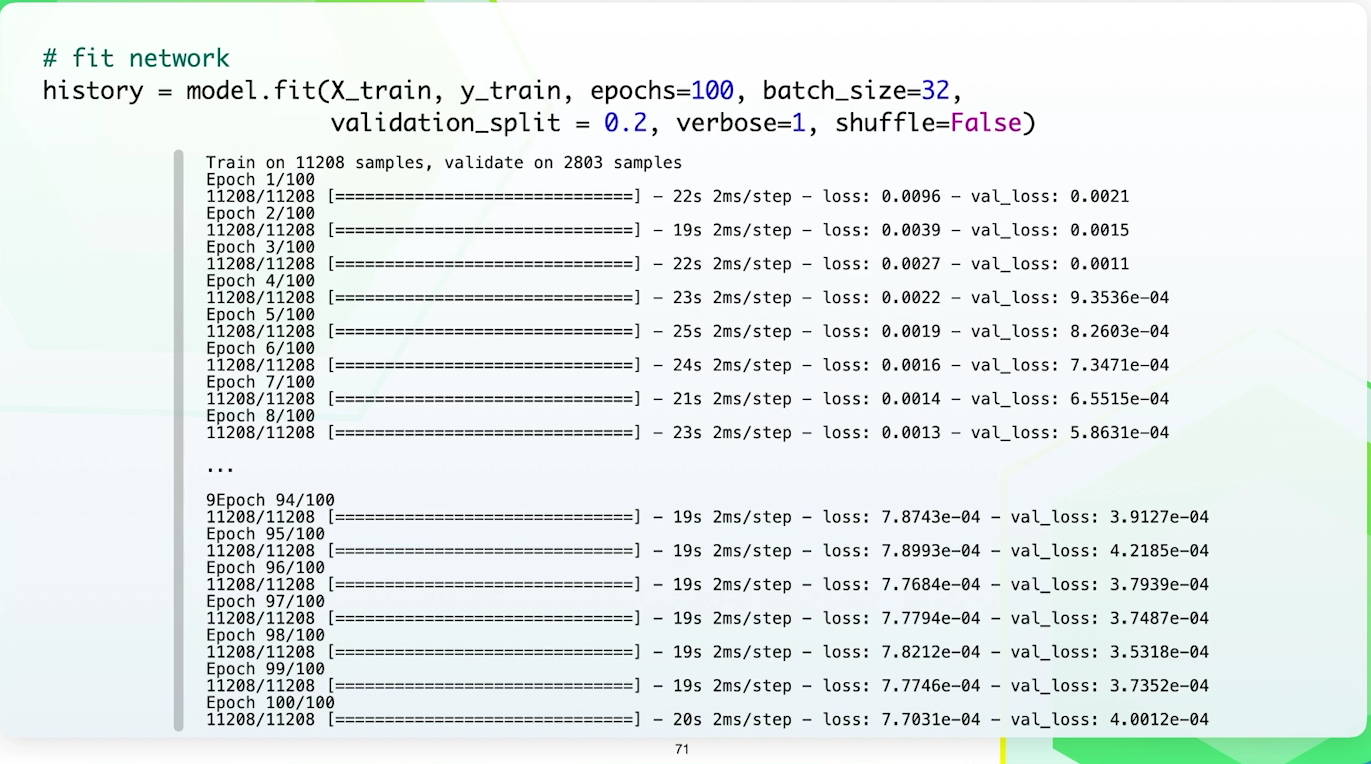

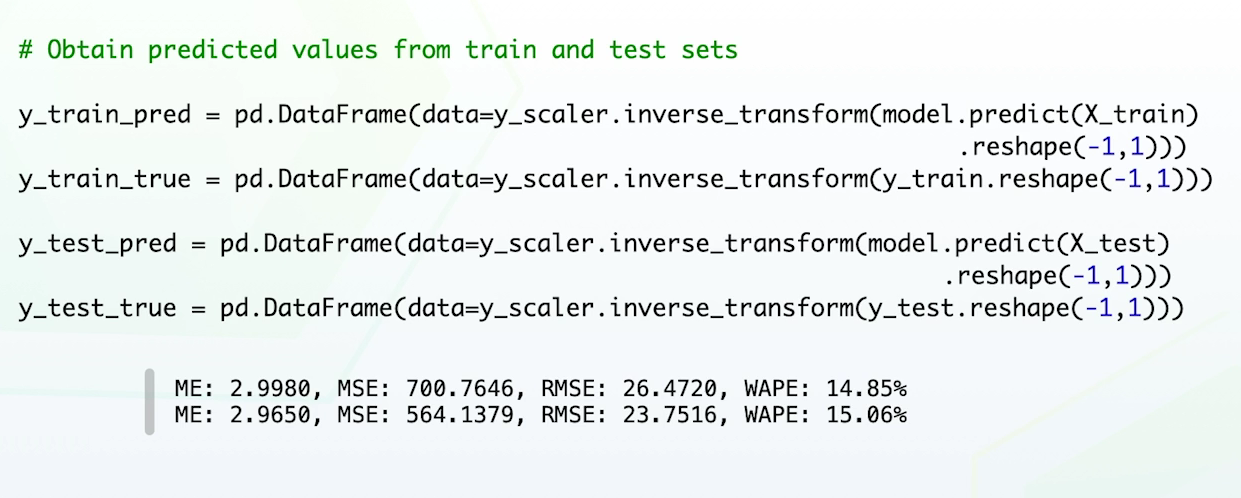

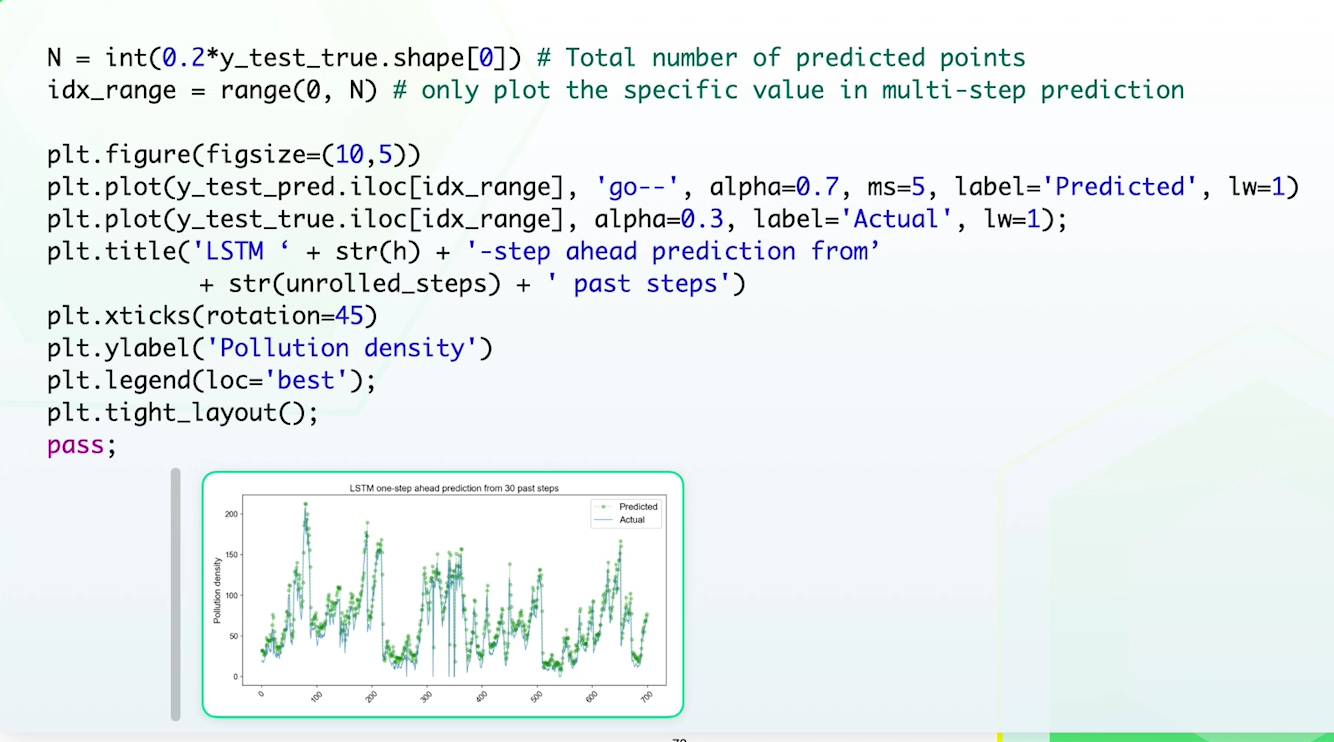

In [ ]:
#fit network
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_split = 0.2, verbose=1, shuffle=False)

Epoch 1/10
351/351 [==============================] - 16s 33ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 2/10
351/351 [==============================] - 18s 52ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 3/10
351/351 [==============================] - 12s 35ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 4/10
351/351 [==============================] - 10s 29ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 5/10
351/351 [==============================] - 9s 27ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 6/10
351/351 [==============================] - 10s 29ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 7/10
351/351 [==============================] - 10s 29ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 8/10
351/351 [==============================] - 10s 29ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 9/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0199 - val_loss: 0.0107
Epoch 10/10
351/351 [==============================] - 10s 28ms/step - loss: 0.0199

In [ ]:
# Obtain predicted values from train and test sets
y_train_pred = pd.DataFrame(data=y_scaler.inverse_transform(model.predict(x_train).reshape(-1, 1)))
y_train_true = pd.DataFrame(data=y_scaler.inverse_transform(y_train.reshape(-1, 1)))

y_test_pred = pd.DataFrame(data=y_scaler.inverse_transform(model.predict(x_test).reshape(-1, 1)))
y_test_true = pd.DataFrame(data=y_scaler.inverse_transform(y_test.reshape(-1, 1)))



110/110 [==============================] - 1s 7ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_true, y_test_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test_true, y_test_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_true, y_test_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Weighted Absolute Percentage Error (WAPE)
wape = (abs(y_test_true - y_test_pred) / abs(y_test_true)).sum() * 100 / len(y_test_true)
print("Weighted Absolute Percentage Error (WAPE):", wape)


Train Data Metrics:
Mean Squared Error (MSE): 17798.777308595705
Root Mean Squared Error (RMSE): 133.41205833280478
Weighted Absolute Percentage Error (WAPE): 0    100.0
dtype: float64

Test Data Metrics:
Mean Squared Error (MSE): 15662.46016086046
Root Mean Squared Error (RMSE): 125.14975094206325
Weighted Absolute Percentage Error (WAPE): 0    100.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


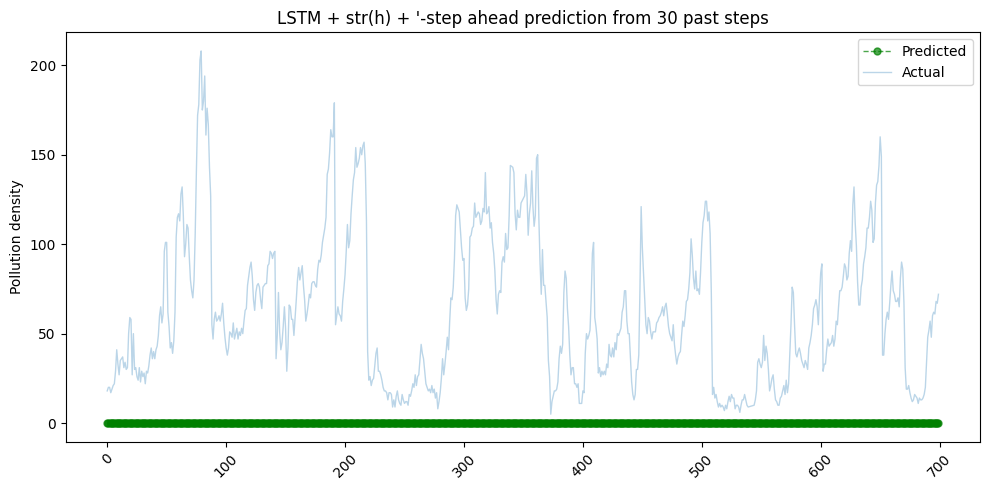

In [ ]:
import matplotlib.pyplot as plt

N = int(0.2 * y_test_true.shape[0])  # Total number of predicted points
idx_range = range(0, N)  # only plot the specific value in multi-step prediction

plt.figure(figsize=(10, 5))
plt.plot(y_test_pred.iloc[idx_range], 'go--', alpha=0.7, ms=5, label='Predicted', lw=1)
plt.plot(y_test_true.iloc[idx_range], alpha=0.3, label='Actual', lw=1)
plt.title("LSTM + str(h) + '-step ahead prediction from " + str(unrolled_steps) + " past steps")
plt.xticks(rotation=45)
plt.ylabel('Pollution density')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
N = int(0.2*y_test_true.shape[0]) # Total number of predicted points
idx_range = range(0, N) # only plot the specific value in multi-step prediction

plt.figure(figsize=(10,5))
plt.plot(y_test_pred.iloc[idx_range], 'go--', alpha=0.7, ms-5, label='Predicted', lw=1)
plt.plot(y_test_true.iloc[idx_range], alpha=0.3, label='Actual', lw=1);
plt.title('LSTM + str(h) + '-step ahead prediction from'
            + str(unrolled_steps) + ' past steps')
plt.xticks(rotation=45)
plt.ylabel('Pollution density')
plt.legend(loc='best');
plt.tight_layout();
pass;

SyntaxError: ignored

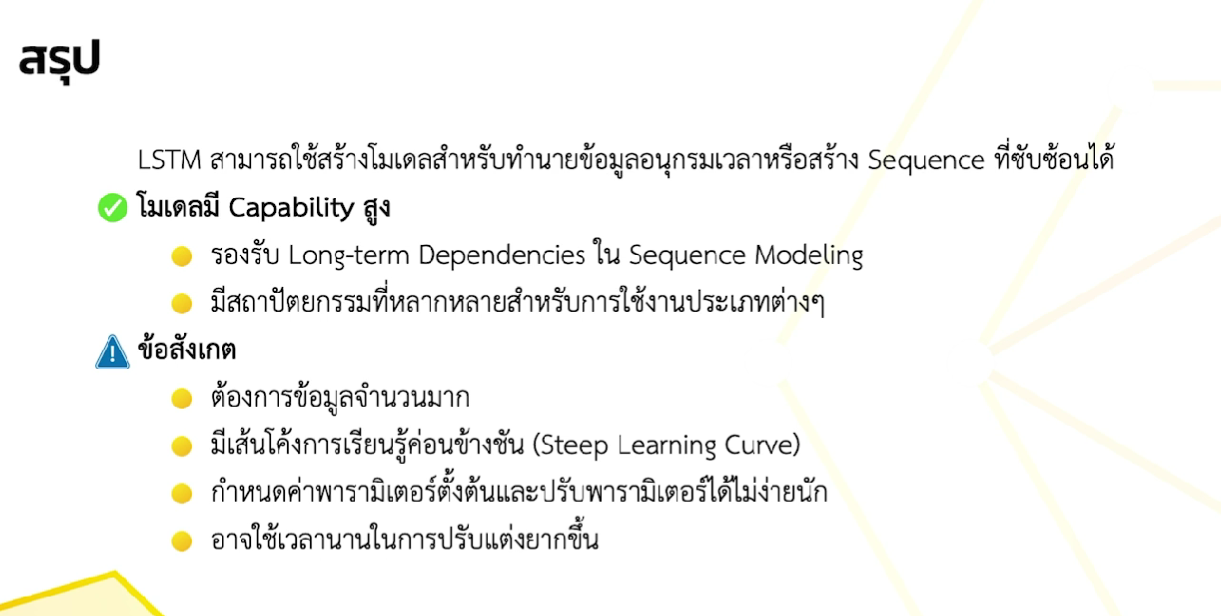